# Essential Math for Data Science

## 5. Linear Regression

### A Basic Linear Regression

m = [1.93939394]
b = [4.73333333]


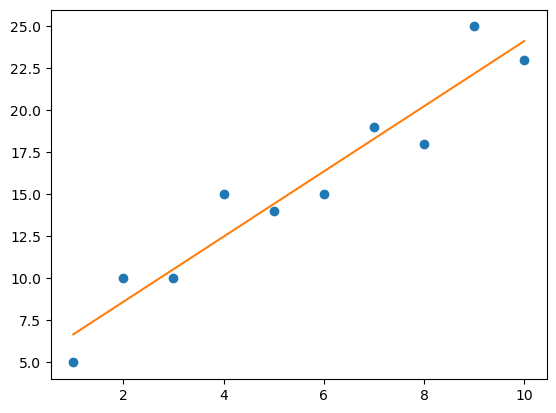

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import data
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',')

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

m = fit.coef_.flatten()
b = fit.intercept_.flatten()

print(f'm = {m}')
print(f'b = {b}')

# Show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X+b)  # line
plt.show()

m = [1.7867224]
b = [-16.51923513]


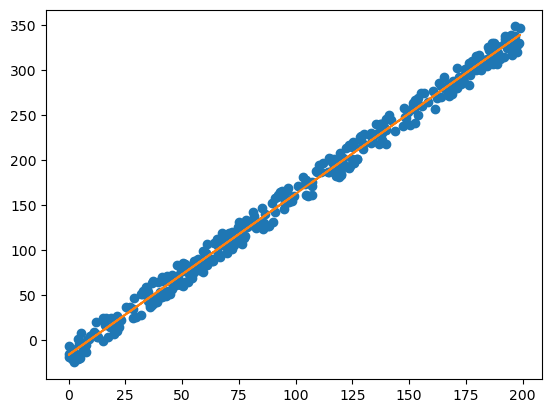

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import data
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter = ',')

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

m = fit.coef_.flatten()
b = fit.intercept_.flatten()

print(f'm = {m}')
print(f'b = {b}')

# Show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X+b)  # line
plt.show()

### Residuals and Squared Errors

In [26]:
import pandas as pd

# Import data
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',').itertuples()

# Test with a given line
m = 1.93939
b = 4.73333

# Calculate the residuals
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual = y_actual - y_predict
    print(residual)

-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


In [27]:
import pandas as pd

# Create a DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22]}

df = pd.DataFrame(data)

# Use itertuples to iterate over the rows
for row in df.itertuples():
    print(f"Name: {row.Name}, Age: {row.Age}")

Name: Alice, Age: 25
Name: Bob, Age: 30
Name: Charlie, Age: 22


In [55]:
import pandas as pd

# Import data
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',').itertuples()

# Test with a given line
m = 1.93939
b = 4.73333
sum_of_squares = 0

# Calculate sum of squares
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_actual - y_predict) ** 2
    sum_of_squares += residual_squared

print(sum_of_squares)

28.096969704500005


### Finding the Best Fit Line
### Closed Form Equation

In [68]:
import pandas as pd

points = list(pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',').itertuples())

n = len(points) # n = 10

m = (n*sum(p.x*p.y for p in points) - sum(p.x for p in points) * 
     sum(p.y for p in points)) / (n*sum(p.x**2 for p in points) - 
     sum(p.x for p in points)**2)

b = (sum(p.y for p in points) / n) - m * sum(p.x for p in points) / n

print(m, b)

1.9393939393939394 4.7333333333333325


### Inverse Matrix Techniques

In [90]:
import pandas as pd
from numpy.linalg import inv
import numpy as np

# Import data
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',')

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder '1' column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T

# Extract output coolumn (all rows, last column)
Y = df.values[:, -1]

# Calculate coefficiens for slope and intercept
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
print(b)

# Predict against the y-values
y_predict = X_1.dot(b)
print(y_predict)

[1.93939394 4.73333333]
[ 6.67272727  8.61212121 10.55151515 12.49090909 14.43030303 16.36969697
 18.30909091 20.24848485 22.18787879 24.12727273]


In [88]:
X_1.transpose()

array([[2., 1.],
       [3., 1.],
       [1., 1.],
       [4., 1.]])

In [84]:
import numpy as np

# Create a 2D NumPy array
arr_2d = np.array([[1, 2, 3],
                   [4, 5, 6]])

# Flatten the 2D array into a 1D array
arr_flat = arr_2d.flatten()

print(arr_2d)
print('\n')
print(arr_flat)

[[1 2 3]
 [4 5 6]]


[1 2 3 4 5 6]


In [87]:
import numpy as np

# Sample input variables (1D array)
X = np.array([2.0, 3.0, 1.0, 4.0])

# Create a placeholder bias term array
bias = np.ones(len(X))

# Stack the input variables and bias term vertically
X_1 = np.vstack([X, bias])
X_2 = np.vstack([X, bias]).T


print(X)
print('\n')
print(X_1)
print('\n')
print(X_2)

[2. 3. 1. 4.]


[[2. 3. 1. 4.]
 [1. 1. 1. 1.]]


[[2. 1.]
 [3. 1.]
 [1. 1.]
 [4. 1.]]


In [4]:
import pandas as pd
from numpy.linalg import qr, inv
import numpy as np

# Import data
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',')

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder '1' column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).transpose() # Alternative: X_1 = np.vstack([X, np.ones(len(X))]).T

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Calculate coefficients for slope and intercept
Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(Y) # Alternative: b = inv(R) @ Q.transpose() @ Y

print(b)

[1.93939394 4.73333333]


### Gradient Descent

In [7]:
import random

def f(x):
    return (x - 3) ** 2 + 4

def dx_f(x):
    return 2 * (x - 3)

# The learning rate
L = 0.001

# The number of iterations to perform gradient descent
iterations = 100_000

# Start at a random x
x = random.randint(-15, 15)

for i in range(iterations):
    # Get slope
    d_x = dx_f(x)
    
    # Update x by subtracting the (learning rate) * (slope)
    x -= L * d_x

print(x, f(x))

2.999999999999889 4.0


In [ ]:
from sympy import *

x = symbols('x')

f = (x - 3) ** 2 + 4

dx_f = diff(f)
print(dx_f)

2*x - 6


In [66]:
import random

def f(x):
    return (x - 3) ** 2 + 4

def dx_f(x):
    return 2 * (x - 3)

# The learning rate
L = 0.001

# The number of iterations to perform gradient descent
iterations = 100

# Start at a random x
x = 4

for i in range(iterations):
    # Get slope
    d_x = dx_f(x)
    
    # Update x by subtracting the (learning rate) * (slope)
    x -= L * d_x
    print(i, x, d_x)

#print(x, f(x))

0 3.998 2
1 3.996004 1.9960000000000004
2 3.994011992 1.9920080000000002
3 3.992023968016 1.9880239839999998
4 3.990039920079968 1.9840479360319998
5 3.988059840239808 1.9800798401599362
6 3.9860837205593285 1.9761196804796164
7 3.98411155311821 1.972167441118657
8 3.9821433300119735 1.9682231062364197
9 3.9801790433519497 1.964286660023947
10 3.978218685265246 1.9603580867038994
11 3.9762622478947156 1.9564373705304918
12 3.974309723398926 1.9525244957894312
13 3.972361103952128 1.948619446797852
14 3.970416381744224 1.944722207904256
15 3.9684755489807353 1.940832763488448
16 3.966538597882774 1.9369510979614706
17 3.9646055206870083 1.9330771957655477
18 3.962676309645634 1.9292110413740167
19 3.960750957026343 1.9253526192912682
20 3.9588294551122902 1.921501914052686
21 3.9569117962020655 1.9176589102245805
22 3.9549979726096613 1.913823592404131
23 3.9530879766644422 1.9099959452193227
24 3.9511818007111135 1.9061759533288845
25 3.9492794371096913 1.902363601422227
26 3.947380878

In [72]:
import pandas as pd

# Import data
points = list(pd.read_csv('https://bit.ly/3goOAnt').itertuples())

# Building the model
m = 0.0
b = 0.0

# The learning rate
L = 0.001

# The number of iterations
iterations = 100_000

n = float(len(points)) # n = 10, the number of elements in X

# Perform gradient descent
for i in range(iterations):
    
    # Slope with respect to m
    D_m = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)
    
    # Slope with respect to b
    D_b = sum(2 * ((m * p.x + b) - p.y) for p in points)
    
    # Update m and b
    m -= L * D_m
    b -= L * D_b

print(f'y = {m}x + {b}')

y = 1.9393939393939548x + 4.733333333333227


In [74]:
import pandas as pd
from sympy import *

# Import data
points = list(pd.read_csv('https://bit.ly/3goOAnt').itertuples())

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls = Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m) \
      .subs(n, len(points) - 1).doit() \
      .replace(x, lambda i: points[i].x) \
      .replace(y, lambda i: points[i].y)


d_b = diff(sum_of_squares, b) \
      .subs(n, len(points) - 1).doit() \
      .replace(x, lambda i: points[i].x) \
      .replace(y, lambda i: points[i].y)

# Compile using lambdify for faster computation
d_m = lambdify([m, b], d_m)
d_b = lambdify([m, b], d_b)

# Buiding the model
m = 0.00
b = 0.00

# The learning rate
L = 0.001

# The number of iterations
iterations = 100_00

# Perform gradient descent
for i in range(iterations):
    
    # Update m and b
    m -= d_m(m, b) * L
    b -= d_b(m, b) * L

print(f'y = {m}x + {b}')

y = 1.939393939393954x + 4.733333333333231


In [74]:
import pandas as pd
from sympy import *

# Import data
points = list(pd.read_csv('https://bit.ly/3goOAnt').itertuples())

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls = Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m) \
      .subs(n, len(points) - 1).doit() \
      .replace(x, lambda i: points[i].x) \
      .replace(y, lambda i: points[i].y)


d_b = diff(sum_of_squares, b) \
      .subs(n, len(points) - 1).doit() \
      .replace(x, lambda i: points[i].x) \
      .replace(y, lambda i: points[i].y)

# Compile using lambdify for faster computation
d_m = lambdify([m, b], d_m)
d_b = lambdify([m, b], d_b)

# Buiding the model
m = 0.00
b = 0.00

# The learning rate
L = 0.001

# The number of iterations
iterations = 100_00

# Perform gradient descent
for i in range(iterations):
    
    # Update m and b
    m -= d_m(m, b) * L
    b -= d_b(m, b) * L

print(f'y = {m}x + {b}')

y = 1.939393939393954x + 4.733333333333231


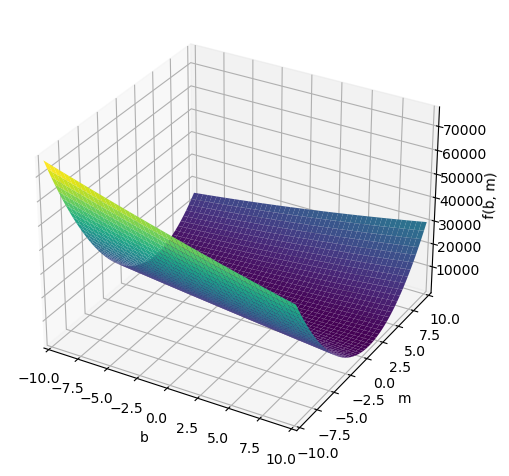

In [77]:
from sympy import *
from sympy.plotting import plot3d
import pandas as pd

points = list(pd.read_csv('https://bit.ly/3goOAnt').itertuples())
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls = Function)

sum_of_squares = Sum((m * x(i) + b - y(i)) ** 2, (i, 0, n)) \
                 .subs(n, len(points) - 1).doit() \
                 .replace(x, lambda i: points[i].x) \
                 .replace(y, lambda i: points[i].y)

plot3d(sum_of_squares);

### Stochastic Gradient Descent

In [99]:
import pandas as pd
import numpy as np

# Import data
data = pd.read_csv('https://bit.ly/3goOAnt', header = 0)

X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values

n = data.shape[0]

# Building the model
m = 0.0
b = 0.0

sample_size = 1  # Sample size
L = 0.0001  # Learning rate
epochs = 1_000_000  # Number of iterations to perform gradient descent

# Performing Stochastic Gradient Descent
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace = False)
    x_sample = X[idx]
    y_sample = Y[idx]
    
    # The current predicted value of Y
    Y_pred = m * x_sample + b
    
    # d/dm derivative of loss function
    D_m = (-2 / sample_size) * sum(x_sample * (y_sample - Y_pred))
    
    # d/db derivative of loss function
    D_b = (-2 / sample_size) * sum(y_sample - Y_pred)
    m = m - L * D_b
    b = b - L * D_b
        
print(f'y = {m}x + {b}')

y = 2.3744848174696793x + 2.3744848174696793


### The Correlation Coefficient

In [101]:
import pandas as pd

# Import data
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',')

# Print correlations between variables
correlations = df.corr(method = 'pearson')

print(correlations)

          x         y
x  1.000000  0.957586
y  0.957586  1.000000


### Calculating the Correlation Coefficient

In [103]:
import pandas as pd
from math import sqrt

points = list(pd.read_csv('https://bit.ly/3goOAnt').itertuples())
n = len(points)

numerator = n * sum(p.x * p.y for p in points) - \
            sum(p.x for p in points) * sum(p.y for p in points)

denominator = sqrt(n * sum(p.x**2 for p in points) - sum(p.x for p in points)**2) \
              * sqrt(n * sum(p.y**2 for p in points) - sum(p.y for p in points)**2)

corr = numerator / denominator

print(corr)

0.9575860952087218


### Statistical Significance

In [104]:
from scipy.stats import t

n = 10
lower_cv = t(n-1).ppf(0.025)
upper_cv = t(n-1).ppf(0.975)

print(lower_cv, upper_cv)

-2.262157162740992 2.2621571627409915


In [106]:
from scipy.stats import t
from math import sqrt

n = 10

lower_cv = t(n-1).ppf(0.025)
upper_cv = t(n-1).ppf(0.975)

# Correlation coefficient derived from data https://bit.ly/2KF29Bd
r = 0.957586

# Perform the test
test_value = r / sqrt((1-r**2) / (n-2))

print(f'TEST VALUE: {test_value}')
print(f'CRITICAL RANGE: {lower_cv}, {upper_cv}')

if test_value < lower_cv or test_value > upper_cv:
    print('Correlation proven, reject H0')

else:
    print('Correlation not proven, failed to reject H0')
    
# Calculate p-value
if test_value > 0:
    p_value = 1.0 - t(n-1).cdf(test_value)

else: p_value = t(n-1).cdf(test_value)

# Two-tailed, so multiply by 2
p_value = p_value * 2

print(f'P-VALUE: {p_value}')

TEST VALUE: 9.399564671312076
CRITICAL RANGE: -2.262157162740992, 2.2621571627409915
Correlation proven, reject H0
P-VALUE: 5.9763860877914965e-06


### Coefficient of Determination

In [108]:
import pandas as pd

# Import data
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',')

# Print correlations between variables
coef_determination = (df.corr(method = 'pearson')) ** 2

print(coef_determination)

          x         y
x  1.000000  0.916971
y  0.916971  1.000000


### Standard Error of the Estimate